# **Diabetic Prediction**

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Collecting Data**

The dataset used in this research is sourced from Kaggle at the following link: https://www.kaggle.com/datasets/aravindpcoder/diabetes-dataset?resource=download. From this dataset, we analysed and built a prediction model to determine whether someone has a risk of diabetes or not.

In [66]:
# Load library yang diperlukan
import pandas as pd

In [67]:
# Load data menjadi data frame
dataset = pd.read_csv('Dataset of Diabetes .csv')

In [68]:
# Display data
dataset

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [69]:
# Display an information of the dataset file
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [70]:
# Display a description of the dataset file
dataset.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


## **2. Data Cleaning**

In this activity, you must be able to check the data you use for missing values, noisy data, or other inappropriate data.

### **2.1. Checking for Missing Value**

In [71]:
dataset.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

Based on the existing checks, **there are no missing values**.

### **2.2. Checking for Duplicate Value**

In [72]:
# Displaying duplicate data
duplicate_rows = dataset.duplicated()
print("All Duplicate Rows:")
dataset[dataset.duplicated(keep=False)]

All Duplicate Rows:


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS


Based on the existing checks, **there are no duplicate values**.

## **3. Encoding**

In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


Based on the existing information, it can be seen that there are several attributes/features that are still data object types, **so it is necessary to adjust the encoding for each attribute/feature**.

In [74]:
# Change feature "Gender" to numeric
Unique_gender = dataset['Gender'].unique()
print("Categories are:", Unique_gender)

Categories are: ['F' 'M' 'f']


In [75]:
category_counts = dataset['Gender'].value_counts()
category_counts

Gender
M    565
F    434
f      1
Name: count, dtype: int64

In [76]:
gender_mapping={'F' : 0,'f' : 0,'M' : 1}
dataset['Gender'] = dataset['Gender'].map(gender_mapping)

In [77]:
# Change feature "CLASS" to numeric
Unique_class = dataset['CLASS'].unique()
print("Categories are:", Unique_class)

Categories are: ['N' 'N ' 'P' 'Y' 'Y ']


In [78]:
category_counts = dataset['CLASS'].value_counts()
category_counts

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

In [79]:
class_mapping={'N' : 0,'P' : 1,'Y' : 2,'Y ' : 2,'N ' : 0}
dataset['CLASS'] = dataset['CLASS'].map(class_mapping)

In [80]:
dataset

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,2
996,671,876534,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,2
997,669,87654,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,2
998,99,24004,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,2


In [81]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   int64  
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 109.5 KB


## **4. Determine Data Objects**

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

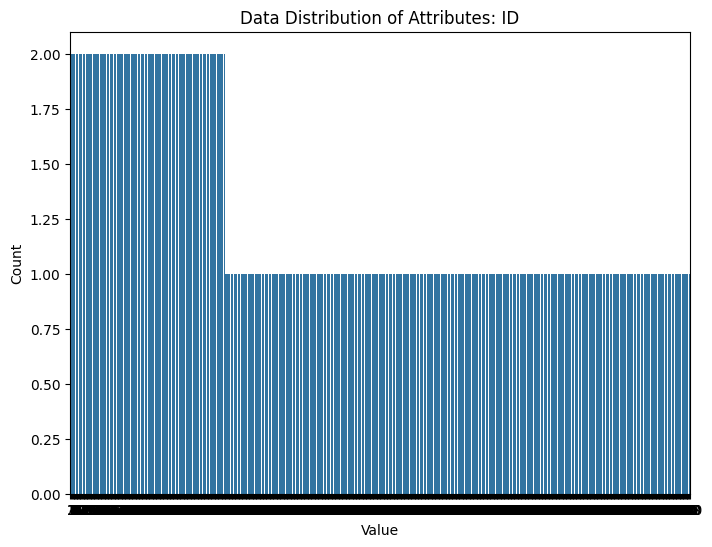

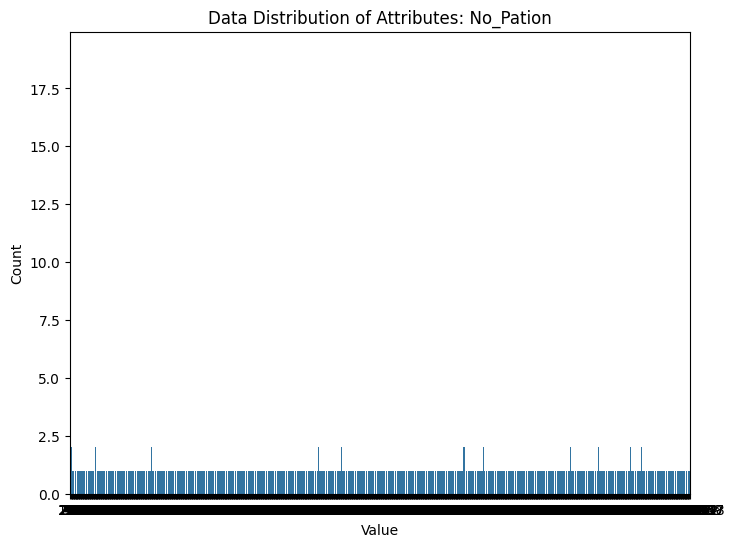

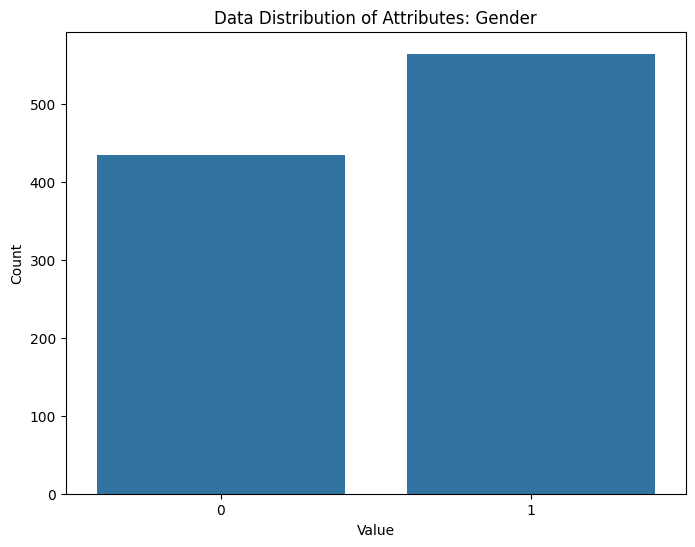

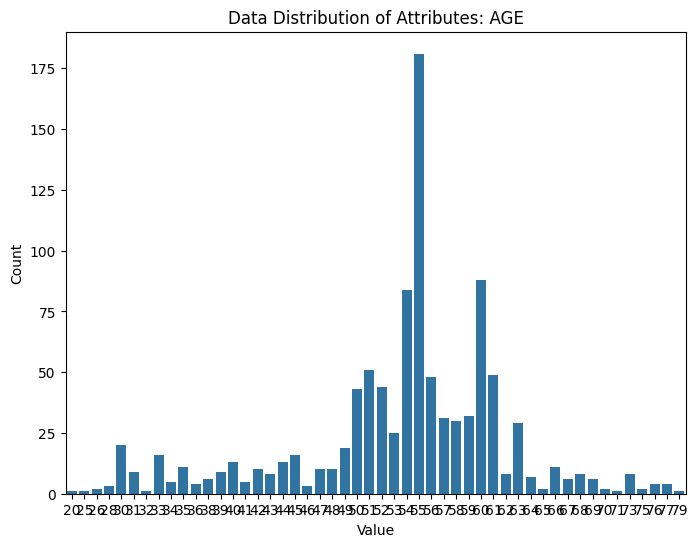

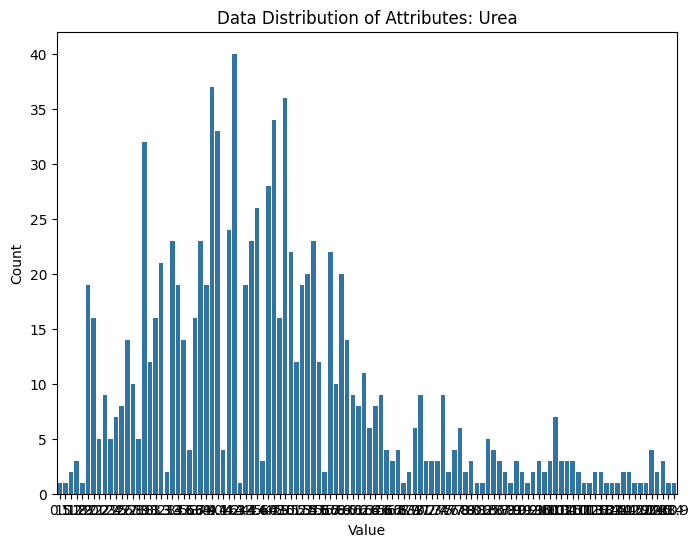

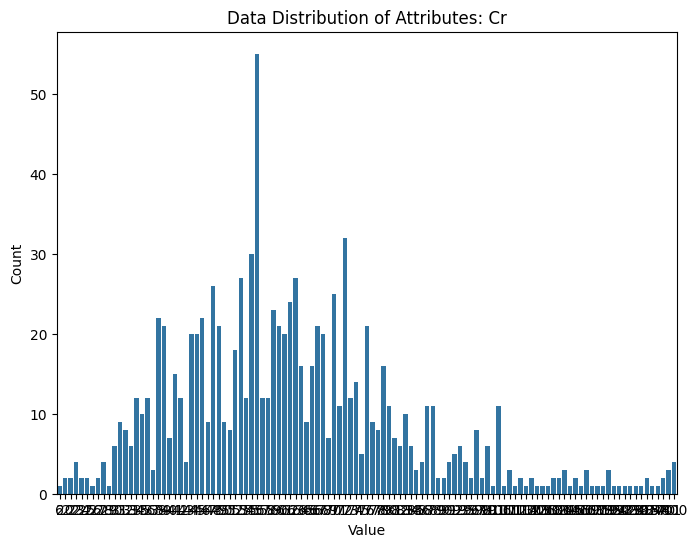

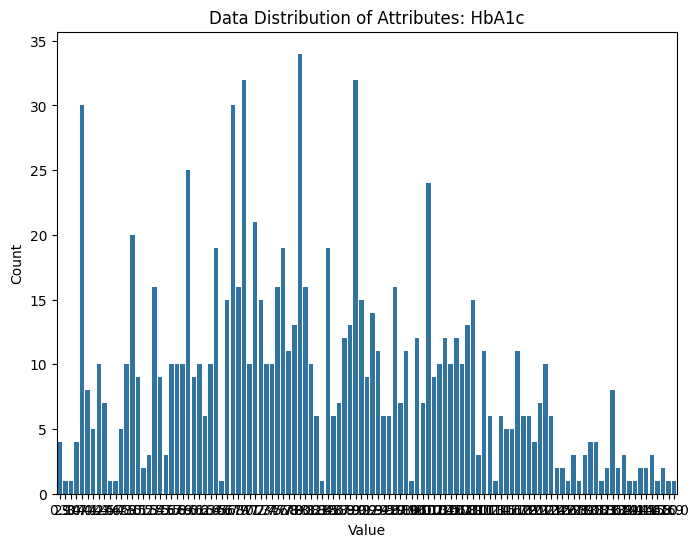

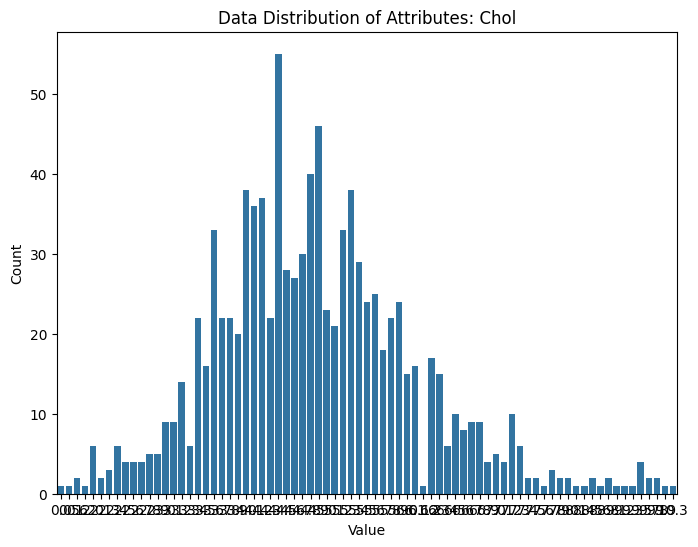

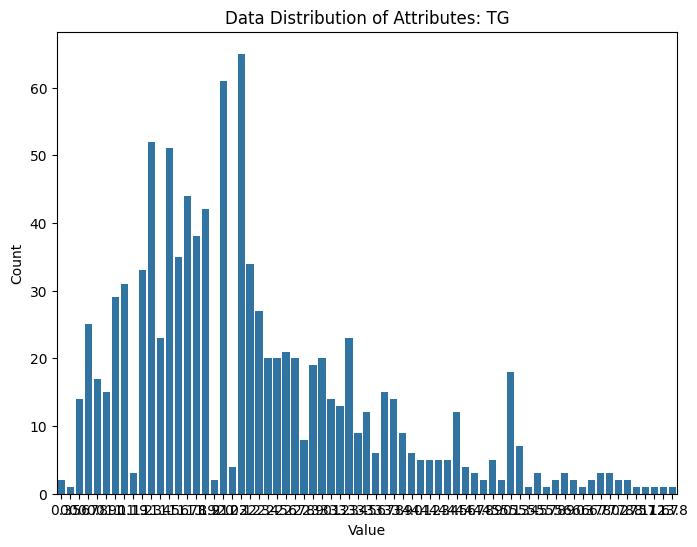

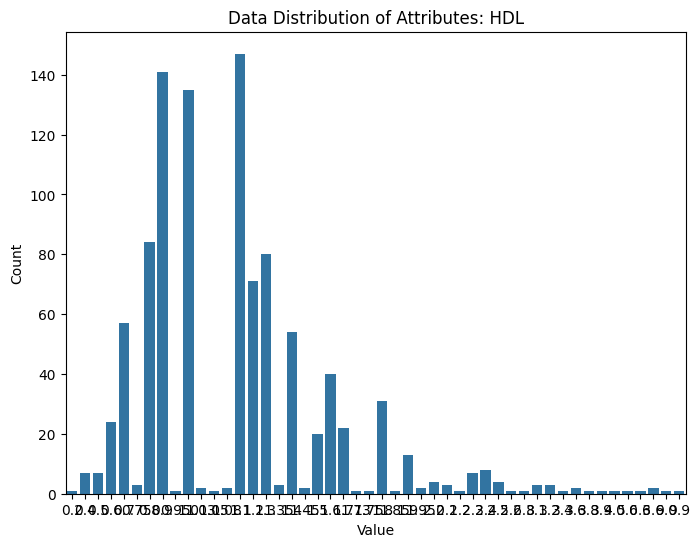

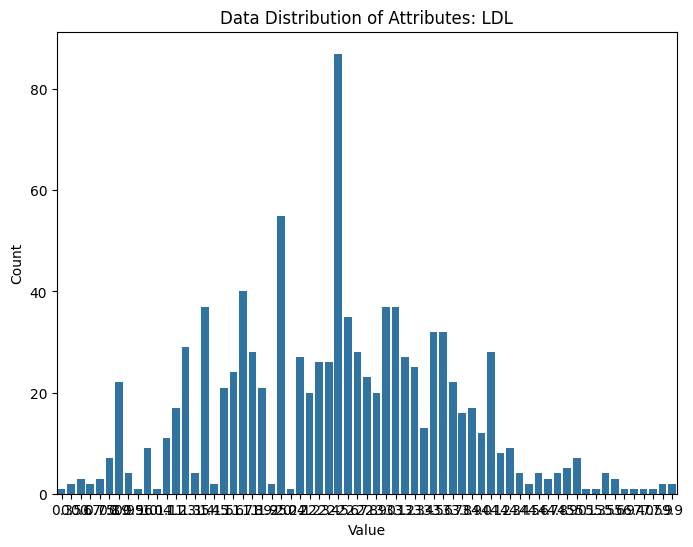

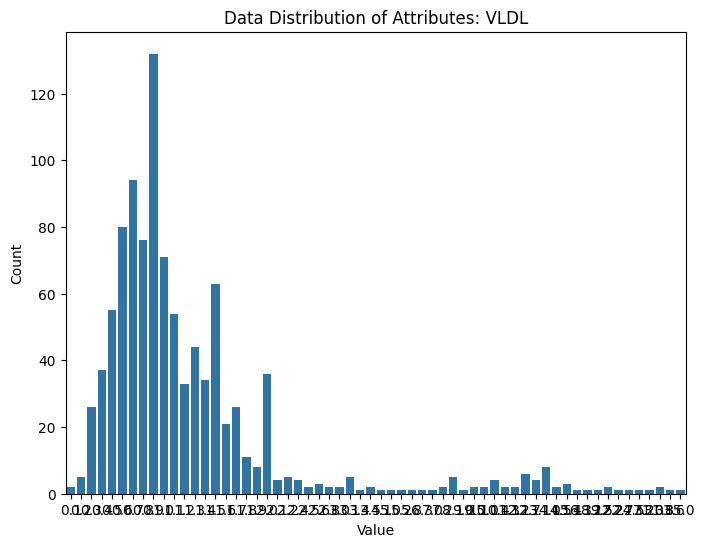

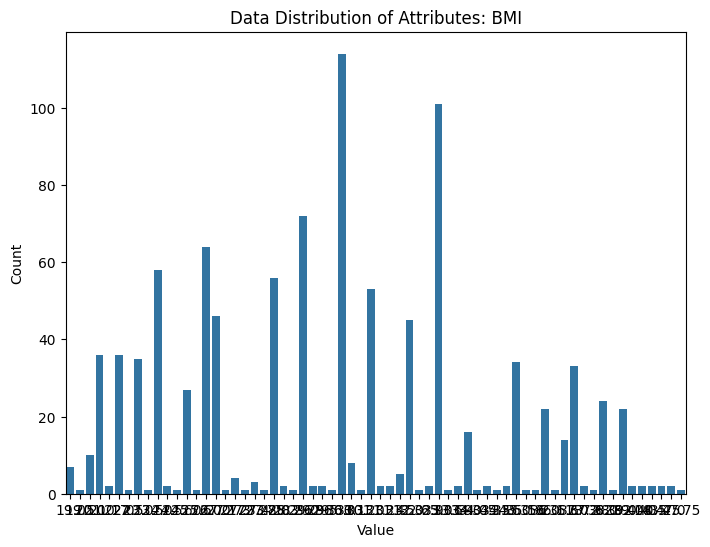

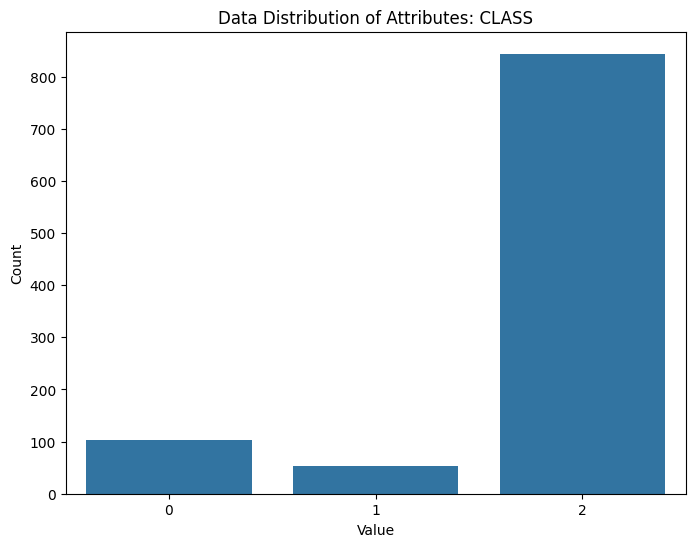

In [83]:
# Display visualisations for each attribute
for atribut in dataset.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=dataset, x=atribut)
    plt.title('Data Distribution of Attributes: {}'.format(atribut))
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.show()

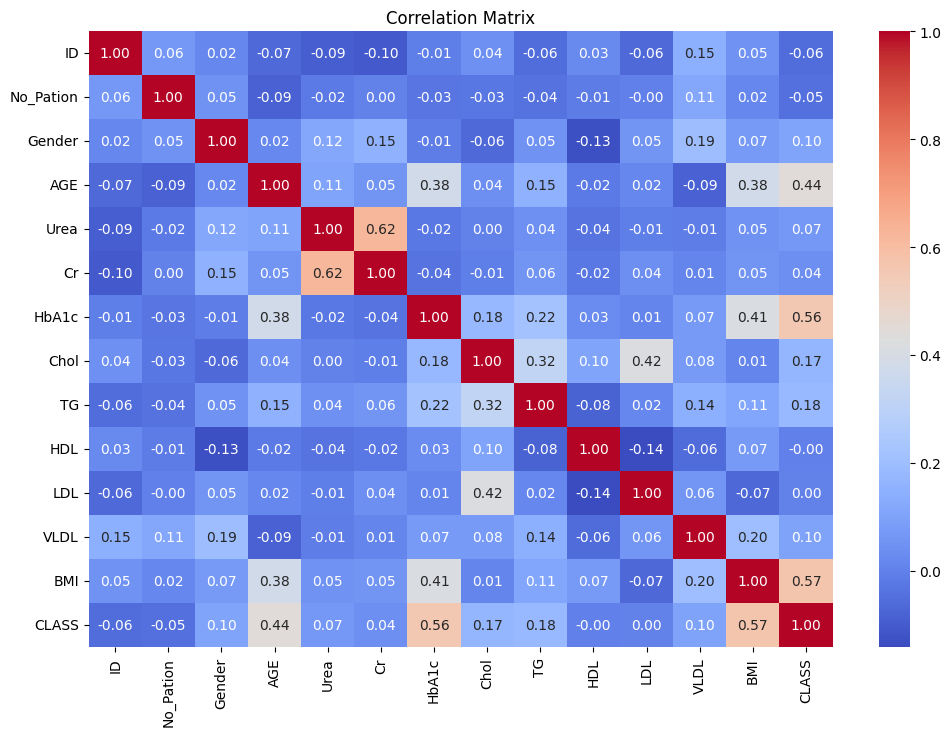

In [84]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

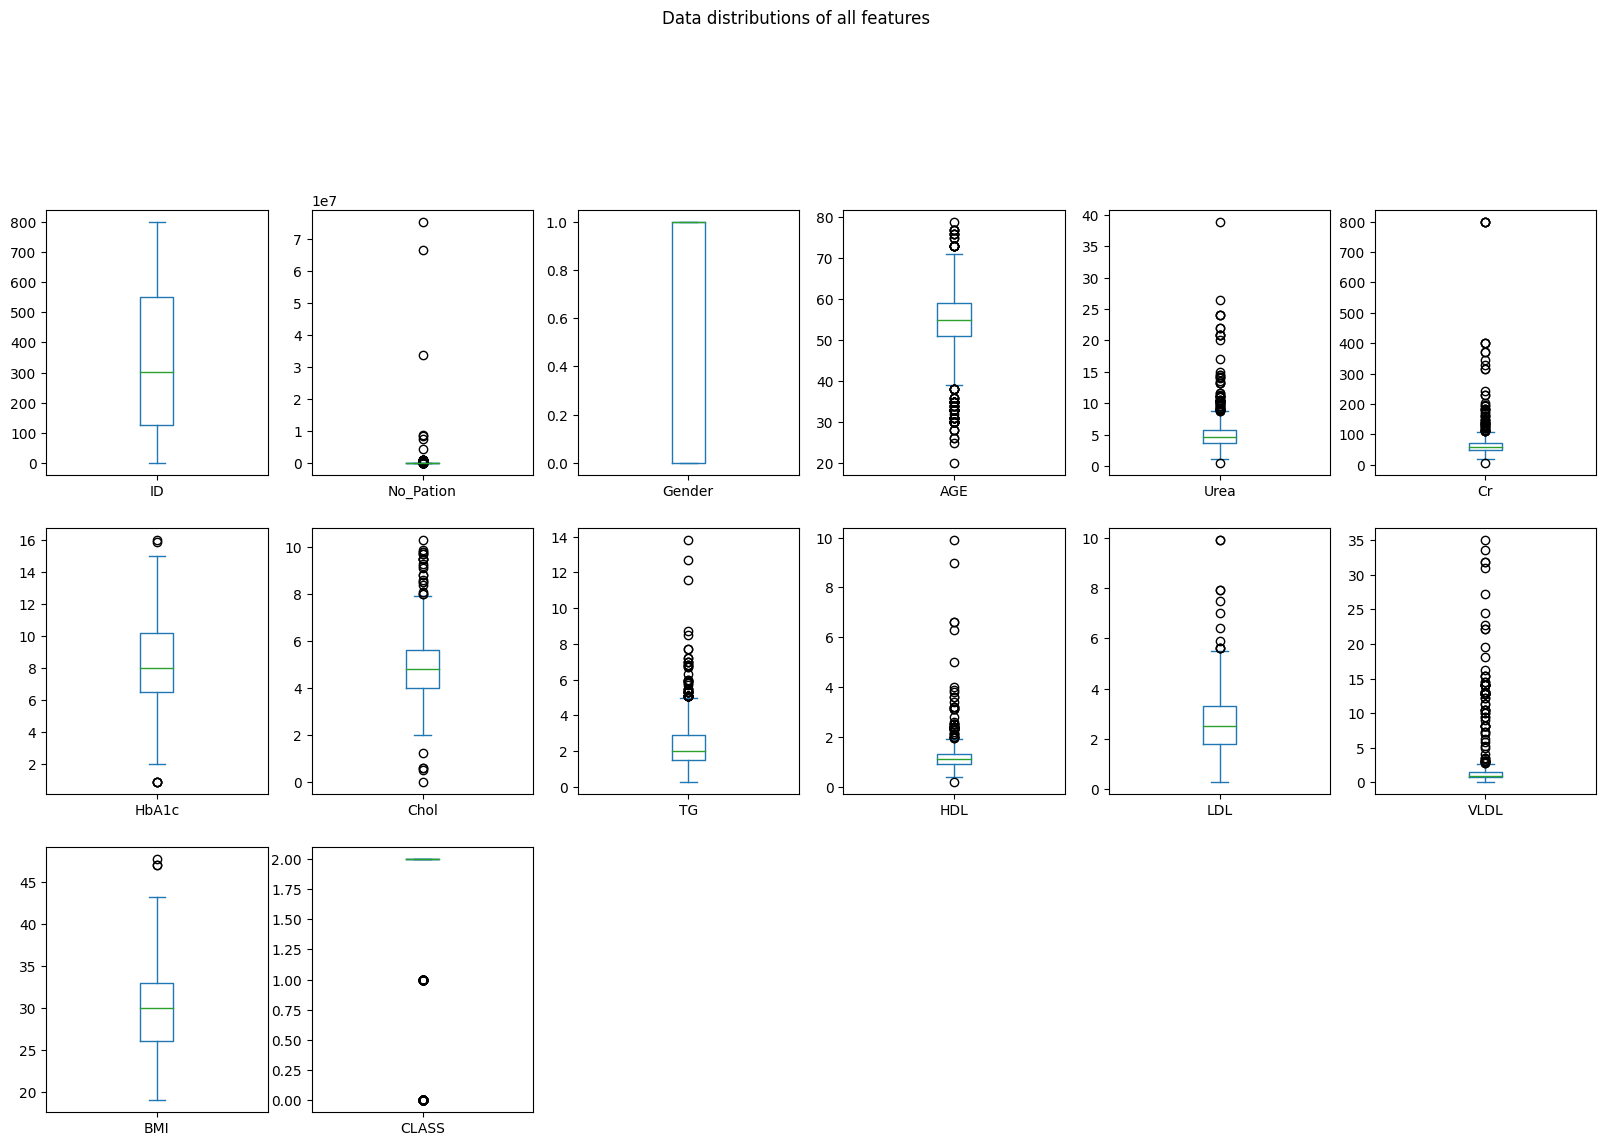

In [85]:
# Display boxplot to see the presence of outliers
dataset.plot(kind='box',subplots=True,layout=(5,6), sharex=False,figsize = (20,20),
                           title='Data distributions of all features')
plt.show()

In [86]:
# Remove features that cannot be used
columns_to_drop = ['ID','No_Pation']
dataset = dataset.drop(columns_to_drop, axis=1)

In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  1000 non-null   int64  
 1   AGE     1000 non-null   int64  
 2   Urea    1000 non-null   float64
 3   Cr      1000 non-null   int64  
 4   HbA1c   1000 non-null   float64
 5   Chol    1000 non-null   float64
 6   TG      1000 non-null   float64
 7   HDL     1000 non-null   float64
 8   LDL     1000 non-null   float64
 9   VLDL    1000 non-null   float64
 10  BMI     1000 non-null   float64
 11  CLASS   1000 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 93.9 KB


In [88]:
dataset

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,2
996,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,2
997,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,2
998,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,2


In the section of determining object data, several processes are carried out to prepare the data so that it can be used for the modelling process. After looking at the visualisation graph regarding the class distribution of all features, it appears that the 'ID' and 'No_Pation' columns have a varied class distribution and of course this attribute also reflects the id number and number of patients, so this attribute does not need to be used in modelling so in this process the column is dropped.

In [89]:
X = dataset.drop("CLASS",axis=1).values
y = dataset.iloc[:,-1]

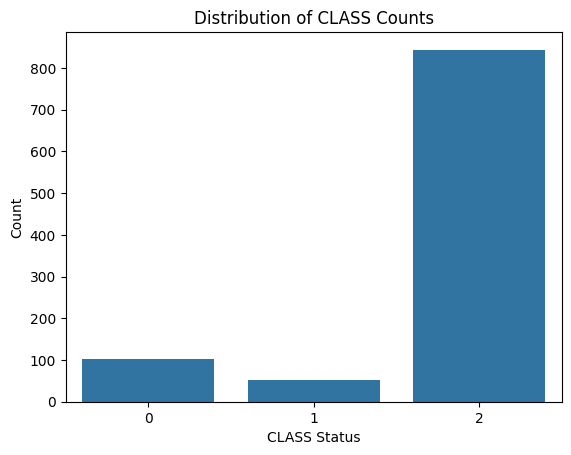

Count of each unique value in 'counts':
CLASS
2    844
0    103
1     53
Name: count, dtype: int64


In [90]:
# Distribution Target Feature

sns.countplot(x='CLASS', data=dataset)
plt.title('Distribution of CLASS Counts')
plt.xlabel('CLASS Status')
plt.ylabel('Count')
plt.show()

counts = dataset['CLASS'].value_counts()

print("Count of each unique value in 'counts':")
print(counts)

**Information:**
- 0 : Non Diabetic (N)
- 1 : Predicted Diabetic (P)
- 2 : Diabetic (Y)

## **6. Data Splitting**

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
# Split features and targets into train and test data (Non Oversampling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

## **7. Modelling (KNN)**

In [93]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [94]:
def evaluate_knn(X_train, y_train, X_test, y_test, k_values, cv_folds):
    all_results = []

    for cv_fold in cv_folds:
        results = []

        for k in k_values:
            knn = KNeighborsClassifier(n_neighbors=k)

            # Define the scoring methods
            accuracy = make_scorer(accuracy_score)
            precision = make_scorer(precision_score, average='macro')
            recall = make_scorer(recall_score, average='macro')
            f1 = make_scorer(f1_score, average='macro')

            # Perform cross-validation
            cv = KFold(n_splits=cv_fold)

            accuracy_scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring=accuracy)
            precision_scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring=precision)
            recall_scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring=recall)
            f1_scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring=f1)

            # Fit the model and evaluate on the test set
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)

            test_accuracy = accuracy_score(y_test, y_pred)
            test_precision = precision_score(y_test, y_pred, average='macro')
            test_recall = recall_score(y_test, y_pred, average='macro')
            test_f1 = f1_score(y_test, y_pred, average='macro')

            results.append({
                'k': k,
                'cv_fold': cv_fold,
                'cv_accuracy': accuracy_scores.mean(),
                'cv_precision': precision_scores.mean(),
                'cv_recall': recall_scores.mean(),
                'cv_f1': f1_scores.mean(),
                'test_accuracy': test_accuracy,
                'test_precision': test_precision,
                'test_recall': test_recall,
                'test_f1': test_f1
            })

        all_results.extend(results)

    return all_results

In [95]:
# Define K values and cross-validation folds
k_values = [2, 3, 5]
cv_folds = [5, 10, 15, 20, 25]

In [96]:
# Display results
for result in results:
    print(f"k: {result['k']}, cv_fold: {result['cv_fold']}, cv_accuracy: {result['cv_accuracy']:.4f}, "
          f"cv_precision: {result['cv_precision']:.4f}, cv_recall: {result['cv_recall']:.4f}, "
          f"cv_f1: {result['cv_f1']:.4f}, test_accuracy: {result['test_accuracy']:.4f}, "
          f"test_precision: {result['test_precision']:.4f}, test_recall: {result['test_recall']:.4f}, "
          f"test_f1: {result['test_f1']:.4f}")

k: 2, cv_fold: 5, cv_accuracy: 0.8700, cv_precision: 0.6222, cv_recall: 0.7105, cv_f1: 0.6536, test_accuracy: 0.9150, test_precision: 0.7455, test_recall: 0.7715, test_f1: 0.7574
k: 3, cv_fold: 5, cv_accuracy: 0.8775, cv_precision: 0.6557, cv_recall: 0.6626, cv_f1: 0.6546, test_accuracy: 0.9150, test_precision: 0.7543, test_recall: 0.6985, test_f1: 0.7235
k: 5, cv_fold: 5, cv_accuracy: 0.8738, cv_precision: 0.6495, cv_recall: 0.6631, cv_f1: 0.6498, test_accuracy: 0.9000, test_precision: 0.6482, test_recall: 0.5985, test_f1: 0.6121
k: 2, cv_fold: 10, cv_accuracy: 0.8738, cv_precision: 0.6152, cv_recall: 0.6985, cv_f1: 0.6421, test_accuracy: 0.9150, test_precision: 0.7455, test_recall: 0.7715, test_f1: 0.7574
k: 3, cv_fold: 10, cv_accuracy: 0.8775, cv_precision: 0.6349, cv_recall: 0.6572, cv_f1: 0.6351, test_accuracy: 0.9150, test_precision: 0.7543, test_recall: 0.6985, test_f1: 0.7235
k: 5, cv_fold: 10, cv_accuracy: 0.8763, cv_precision: 0.6313, cv_recall: 0.6477, cv_f1: 0.6310, test_ac

## **8. Model Evaluation** <a class="anchor" id="h9"></a>

In [97]:
# Create a DataFrame to hold the evaluation results
columns = ['k', 'cv_fold', 'cv_accuracy', 'cv_precision', 'cv_recall', 'cv_f1', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1']
results_df = pd.DataFrame(results, columns=columns)

# Compare evaluation results in DataFrame form
model_comp = pd.DataFrame({
    'k': results_df['k'],
    'cv_fold': results_df['cv_fold'],
    'cv_accuracy': results_df['cv_accuracy'] * 100,
    'cv_precision': results_df['cv_precision'] * 100,
    'cv_recall': results_df['cv_recall'] * 100,
    'cv_f1': results_df['cv_f1'] * 100,
    'test_accuracy': results_df['test_accuracy'] * 100,
    'test_precision': results_df['test_precision'] * 100,
    'test_recall': results_df['test_recall'] * 100,
    'test_f1': results_df['test_f1'] * 100
})

# Show comparison results
model_comp

,k,cv_fold,cv_accuracy,cv_precision,cv_recall,cv_f1,test_accuracy,test_precision,test_recall,test_f1
0,2,5,87.000000,62.219726,71.052191,65.360021,91.5,74.551539,77.152249,75.743505
1,3,5,87.750000,65.566317,66.258474,65.459450,91.5,75.432258,69.845966,72.348928
2,5,5,87.375000,64.946741,66.305825,64.979653,90.0,64.822211,59.845966,61.207670
3,2,10,87.375000,61.524309,69.853385,64.212986,91.5,74.551539,77.152249,75.743505
4,3,10,87.750000,63.494056,65.720778,63.510122,91.5,75.432258,69.845966,72.348928
5,5,10,87.625000,63.126461,64.774169,63.097253,90.0,64.822211,59.845966,61.207670
6,2,15,88.006056,63.989564,72.058366,66.638678,91.5,74.551539,77.152249,75.743505
7,3,15,87.631027,64.842932,65.635014,64.232039,91.5,75.432258,69.845966,72.348928
8,5,15,87.253669,61.543308,63.965984,61.779407,90.0,64.822211,59.845966,61.207670
9,2,20,87.750000,62.005977,67.547897,63.072598,91.5,74.551539,77.152249,75.743505
